In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
df = pd.DataFrame({
    'x': [4.5, 4.9, 5.0, 4.8, 5.8, 5.6, 5.7, 5.8],
    'y': [35, 38, 45, 49, 59, 65, 73, 82],
    'z': [0, 0, 0, 0, 1, 1, 1, 1]
})
df

,x,y,z
0,4.5,35,0
1,4.9,38,0
2,5.0,45,0
3,4.8,49,0
4,5.8,59,1
5,5.6,65,1
6,5.7,73,1
7,5.8,82,1


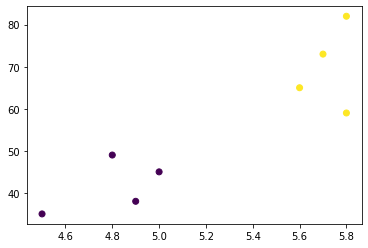

In [4]:
plt.scatter(df['x'], df['y'], c=df['z'])

## Train model

In [5]:
def fit(X, y, max_epochs=500):
    """
    X : numpy 2D array. Each row corresponds to one training example.
    y : numpy 1D array. Label (0 or 1) of each example.
    """

    n = X.shape[1]

    # Initialize weights
    weights = np.zeros((n, ))
    bias    = 0.0

    for _ in range(max_epochs):
        errors = 0

        # Loop through the examples
        for i, xi in enumerate(X):

            predict_y = 1 if xi.dot(weights) + bias >= 0 else 0
            error     = y[i] - predict_y

            # Update weights
            if error != 0:
                weights += error * xi
                bias    += error

                errors += 1

        # We converged
        if errors == 0:
            break


    return (weights, bias)

In [6]:
X = df.drop('z', axis=1).values
y = df['z'].values

weights, bias = fit(X, y)
weights, bias

(array([-47.8,   5. ]), -17.0)

## Plot predictions

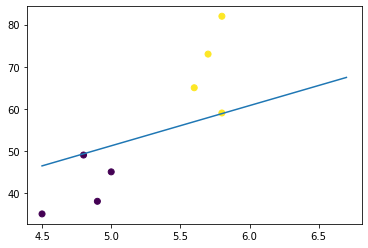

In [7]:
def plot_decision_boundary():

    # Draw points
    plt.scatter(X[:,0], X[:,1], c=y)

    a = -weights[0]/weights[1]
    b = -bias/weights[1]

    # Draw hyperplane with margin
    _X = np.arange(X[:,0].min(), X[:,0].max()+1, .1)
    _Y = _X * a + b
    plt.plot(_X, _Y)

plot_decision_boundary()

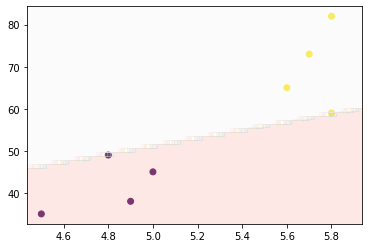

In [8]:
def plot_contour():

    # Draw points
    plt.scatter(X[:,0], X[:,1], c=y)

    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()

    # Draw contour
    xx, yy = np.meshgrid(np.arange(x_min, x_max+.1, .1),
                         np.arange(y_min, y_max+.1, .1))
    _X = np.c_[xx.ravel(), yy.ravel()]

    Z  = np.sign(_X.dot(weights) + bias) \
           .reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.3)

plot_contour()

## Compare with logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
model = LogisticRegression(C=1e20, solver='liblinear', random_state=0)
model.fit(X, y)

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

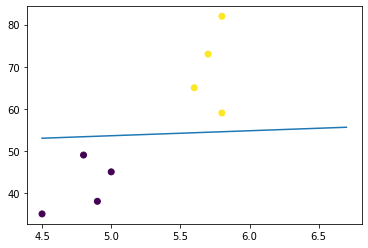

In [11]:
weights = model.coef_[0]
bias    = model.intercept_[0]

plot_decision_boundary()

## Compare with SVM

In [12]:
from sklearn import svm

In [13]:
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

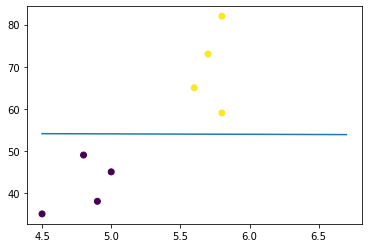

In [14]:
weights = model.coef_[0]
bias    = model.intercept_[0]

plot_decision_boundary()